# [E-05] 나랑 닮은 연예인은 누구?

## 1.모듈 및 이미지 불러오기

In [15]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition
from PIL import Image
import glob
import numpy as np
import pandas as pd
# 필요한 모듈 불러오기
%matplotlib inline



dir_path = os.getenv('HOME')+'/aiffel/exploration/image/data'
#dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(len(file_list)))



file_list: 491


- 해당 프로젝트에 사용할 이미지 갯수 : 491

## 2. 6개의 이미지 확인

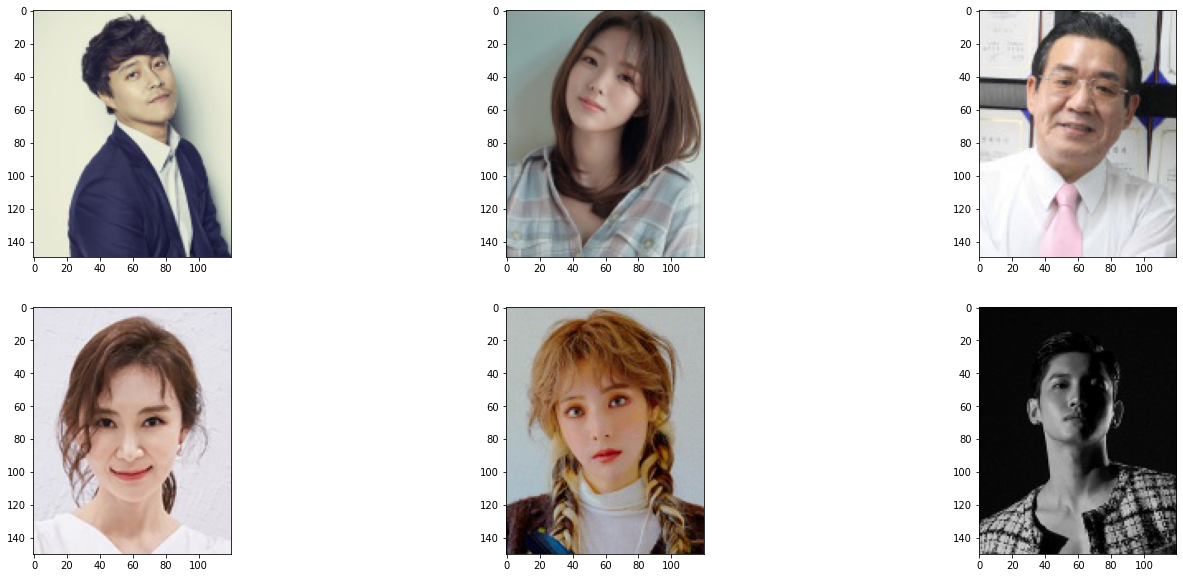

In [16]:
# Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path+'/'+file_list[i])
    ax.imshow(image)
plt.show()

fig.tight_layout()

## 3. 얼굴별로 임베딩 확인

In [ ]:
# 내가 생각해서 넣은 코드
embedding_dict = {} # 각 사진들의 임베딩 저장
    
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)

    for file in file_list:
        try: 
            img_path = os.path.join(dir_path, file)            
            image = face_recognition.load_image_file(img_path)
            face_locations = face_recognition.face_locations(image)
            embedding = get_face_embedding(face)
            
            
            if len(embedding) > 0:  
            # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
            # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
                #  embedding_dict[] 이미지 파일의 임베딩을 구해 담음 키=사람이름, 값=임베딩 벡터
                #  os.path.splitext(file)[0] 파일의 확장자를 제거한 이름만 추출
                #  embedding[0]은 넣고 싶은 요소값

        except:
            continue
            
    return embedding_dict

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as img
import face_recognition


def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)
        

In [ ]:
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [19]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

print(f"두 얼굴간의 거리는 :{get_distance('me', 'iu')}")

두 얼굴간의 거리는 :0.5518690585630291


### 4-1 우수노드 참고

In [95]:
# 우수노드 참고 및 수정
embedding_dict = {} # 각 사진들의 임베딩 저장
cropped_face_dict = {} # 얼굴 이미지 저장

# images 디렉토리 안에 있는 모든 이미지 파일의 임베디을 구해서 dict 구조에 담아 리턴하는 함수
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)

    for file in file_list:
        try:
            
            img_path = os.path.join(dir_path, file)

            image = face_recognition.load_image_file(img_path)
            face_locations = face_recognition.face_locations(image)
            print(f"crop the image: {file}")
            # face_locations = face_recognition.face_locations(image, number_of_times_to_upsample=0, model="cnn")

            if not face_locations: # 얼굴 위치를 찾지 못하는 경우
                print(f"Cannot crop the image: {file}")
                continue

            else: # 얼굴 부분만 잘라낸다
                a, b, c, d = face_locations[0]
                cropped_face = image[a:c, d:b, :]
                print(f"get embedding of the image: {file}")
            embedding = face_recognition.face_encodings(cropped_face)

            if not embedding: # 임베딩 벡터를 구하지 못하는 경우
                print(f"Cannot get embedding of the image: {file}")
                continue

            if len(embedding) > 0:
                # 얼굴영역 face가 제대로 detect 되지 않으면 len(embedding) == 0인 경우가 발생하므로
                # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담긴다
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
                cropped_face_dict[os.path.splitext(file)[0]] = cropped_face
        except:
            continue
            
    return embedding_dict

In [96]:
embedding_dict = get_face_embedding_dict(dir_path)

crop the image: 최대철.jpg
get embedding of the image: 최대철.jpg
crop the image: 채수빈.jpg
get embedding of the image: 채수빈.jpg
crop the image: 정한용.jpg
get embedding of the image: 정한용.jpg
crop the image: 채시라.jpg
get embedding of the image: 채시라.jpg
crop the image: 주니엘.jpg
get embedding of the image: 주니엘.jpg
crop the image: 최강창민.jpg
get embedding of the image: 최강창민.jpg
Cannot get embedding of the image: 최강창민.jpg
crop the image: 조성모.jpg
get embedding of the image: 조성모.jpg
crop the image: 이종혁.jpg
get embedding of the image: 이종혁.jpg
crop the image: 조유정.jpg
get embedding of the image: 조유정.jpg
crop the image: 조덕배.jpg
get embedding of the image: 조덕배.jpg
crop the image: 정민아.jpg
get embedding of the image: 정민아.jpg
crop the image: 진해성.jpg
get embedding of the image: 진해성.jpg
crop the image: 최용준.jpg
Cannot crop the image: 최용준.jpg
crop the image: 정석원.jpg
get embedding of the image: 정석원.jpg
crop the image: 이준기.jpg
get embedding of the image: 이준기.jpg
crop the image: 청하.jpg
get embedding of the image: 청하.jpg
c

## 4.자신의 얼굴과 연예인 얼굴 거리비교

In [65]:
def get_nearest_face(name, top=10):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            
get_nearest_face('me')

순위 1 : 이름(차선우), 거리(0.33261572981934445)
순위 2 : 이름(최권수), 거리(0.3750011349281407)
순위 3 : 이름(정동하), 거리(0.37883717576639503)
순위 4 : 이름(이초희), 거리(0.3878324927182624)
순위 5 : 이름(정경호), 거리(0.3906957273617043)
순위 6 : 이름(채원빈), 거리(0.3933860261258988)
순위 7 : 이름(이현우), 거리(0.3934856011621033)
순위 8 : 이름(최우식), 거리(0.3947768324993645)
순위 9 : 이름(정주연), 거리(0.3977139197428204)
순위 10 : 이름(전진서), 거리(0.39948093329364337)


## 5.임베딩 완료된 데이터셋

In [66]:
celebrity_list = list(embedding_dict.keys())     # 데이터의 이름(연예인 이름)

data = {
    'Group1' : celebrity_list[:10],
    'Group2' : celebrity_list[10:20],
    'Group3' : celebrity_list[30:40],
    'Group4' : celebrity_list[50:60],
    'Group5' : celebrity_list[60:70],
    'Group6' : celebrity_list[70:80],
    'Group7' : celebrity_list[90:100],
    'Group8' : celebrity_list[100:110],
}

df = pd.DataFrame(data)
df

,Group1,Group2,Group3,Group4,Group5,Group6,Group7,Group8
0,최대철,진해성,전소연,임유진,천명훈,임시완,이충주,장성윤
1,채수빈,정석원,최병학,정인선,장동윤,조경환,차윤지,최수종
2,정한용,이준기,이화영,조정석,이주승,조동혁,이혁재,이종수
3,채시라,청하,차학연,조태준,정혜성,정지훈,지원이,이지아
4,주니엘,전원주,정인기,이현우,전효성,전국환,최수영,dark1
5,조성모,임혁,장신영,전익령,이종남,정동남,정재원,조상기
6,이종혁,정연주,지세현,정수정,장나라,정훈희,정려원,정휘
7,조유정,인교진,전소민,정두언,주원,이지훈,존박,정유진
8,조덕배,최시원,임별,정혜선,정은채,조관우,정은찬,장기범
9,정민아,정선경,진예솔,이주연,임원희,장혜진,정정길,최민


## 6. 우수노드 참조한 데이터 시각화 for TSNE

In [97]:
embedding_vector = []

for value in embedding_dict.values():
    embedding_vector.append(value.tolist())

embedding_vector = np.array(embedding_vector)

print(np.array(embedding_vector).shape)

(418, 128)


In [113]:
import cv2
IMG_SIZE = 28

face_list = []
for value in cropped_face_dict.values():
    face = cv2.resize(value, (IMG_SIZE, IMG_SIZE))
    face_list.append(face)

len(face_list)
face_list = np.array(face_list)
face_list.shape

(418, 28, 28, 3)

- 파일 데이터를 28* 28 사이즈로 변환하고 Numpy를 이용해 4차원 배열로 변환

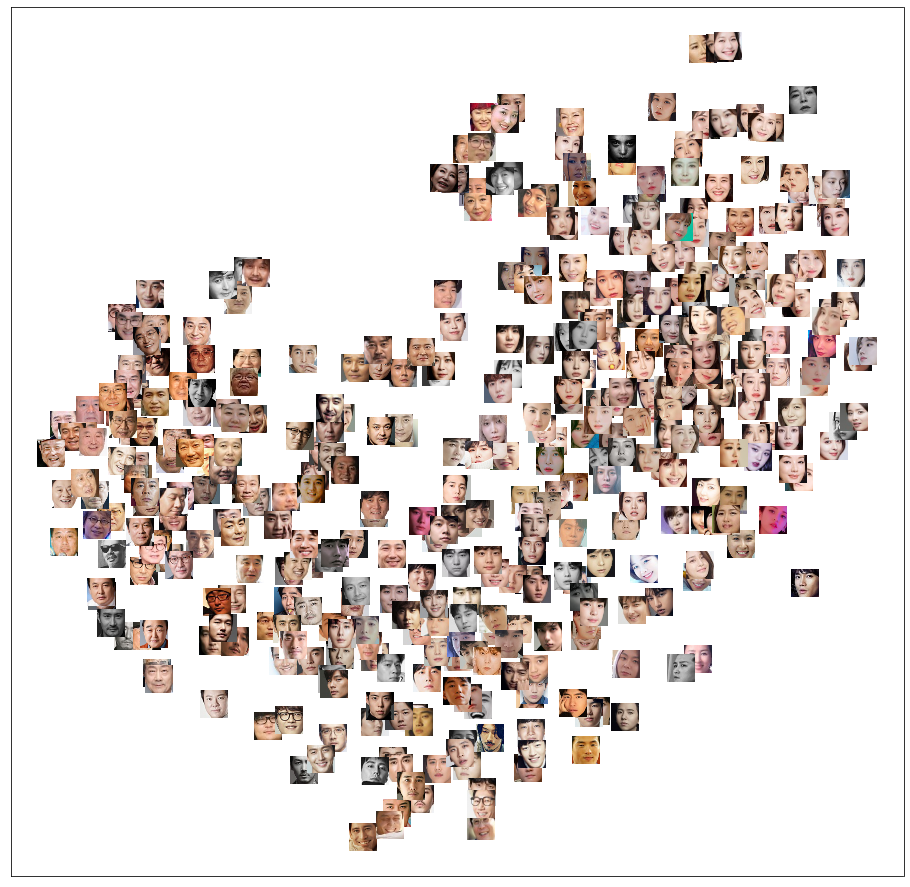

In [107]:
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from sklearn.manifold import TSNE
import scipy as sp

plt.figure(figsize=(16,16))

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(embedding_vector[:])

ax = plt.subplot(1, 1, 1)
ax.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', cmap='rainbow')
for i in range(418):
    imagebox = OffsetImage(face_list[i].reshape(28, 28, 3))
    ab = AnnotationBbox(imagebox, (tsne_vector[i,0], tsne_vector[i,1]), frameon=False, pad=0.0)
    ax.add_artist(ab)

ax.set_xticks([])
ax.set_yticks([])
plt.show()

- 데이터들에 시각화를 통해 클러스터링이 용이해졌단걸 확인할 수 있습니다.

### 회고
    시각화를 어떻게 할 지 고민하다가 노드에 나왔던 TSNE를 도전해봤다..인터넷에서 찾으면서 천천히 코드를 바꿨는데 역시 실력이 부족해서 그런지 다양한 오류가 나와..결국 우수노드를 참고하기로 하였다..결과는 다행히 정상적으로 출력되서 아직 갈 길이 멀다고 생각한다..코드에 대한 이해도를 조금 더 높혀야 할 것 같다..모델을 사용하여하는 노드가 아니라 그나마 시간적으로 덜 걸렸지만 코드와 이미지 인식에 관해서 안되는 부분이 많아 수정을 조금 하였고 트러블 슈팅 실력이 점점 늘고 있는것 같아서 얻는게 상대적으로 많았던 노드였던 것 같다.